## 1. Setup and Load Data

#### 1.1 Install Dependencies and Setup

In [ ]:
%pip install tensorflow opencv-python matplotlib

In [ ]:
%pip list

In [1]:
import tensorflow as tf
import os

In [3]:
#Avoid OOM errors by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### 1.2 Remove Dodgy Images

In [98]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [99]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

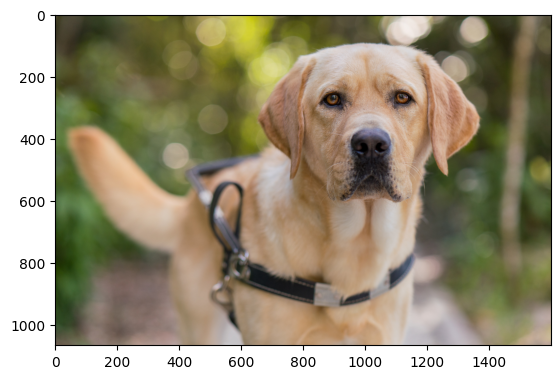

In [100]:
ig = cv2.imread(os.path.join(data_dir,'dogs', '04-21-2022_SGD7186-X3.jpg'))

plt.imshow(cv2.cvtColor(ig,cv2.COLOR_BGR2RGB))
plt.show()

In [101]:
ti = imghdr.what(os.path.join(data_dir,'dogs', '04-21-2022_SGD7186-X3.jpg'))
ti

'jpeg'

In [102]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))           

### 1.3 Load Data

In [ ]:
tf.data.Dataset??

In [103]:
import numpy as np


In [104]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 195 files belonging to 2 classes.


In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [105]:
data_iterator = data.as_numpy_iterator()

In [106]:
batch = data_iterator.next()

In [107]:
batch[0].shape

(32, 256, 256, 3)

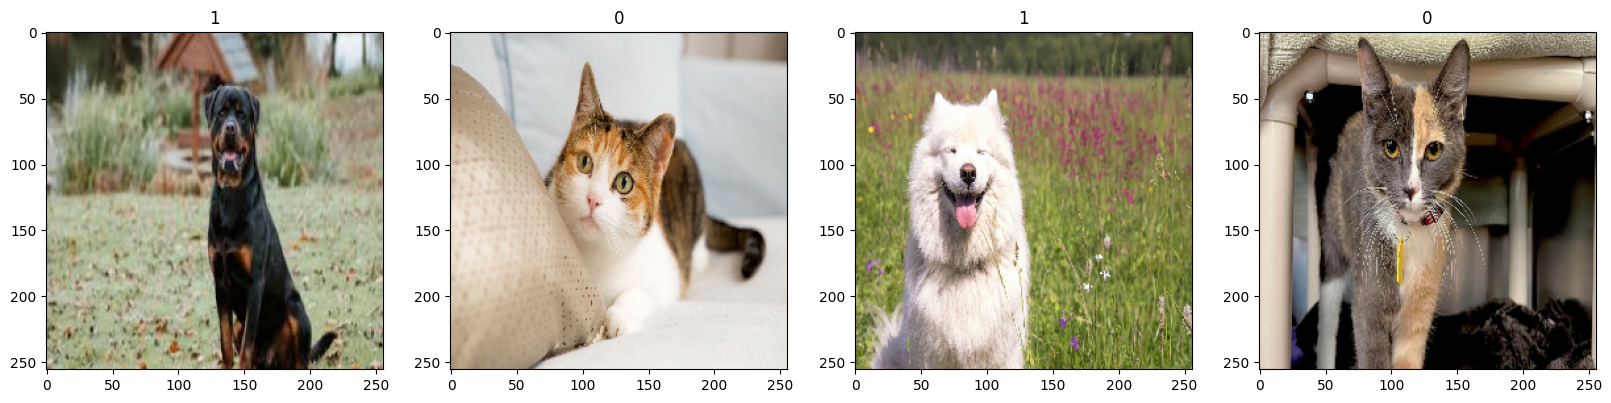

In [108]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# label 0 = cat
# label 1 = dog

## 2. Preprocess Data

### 2.1 Scale Data

In [109]:
data = data.map(lambda x, y: (x/255, y))

In [110]:
scaled_iterator = data.as_numpy_iterator()

In [111]:
batch = scaled_iterator.next()

In [112]:
batch[1]

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int32)

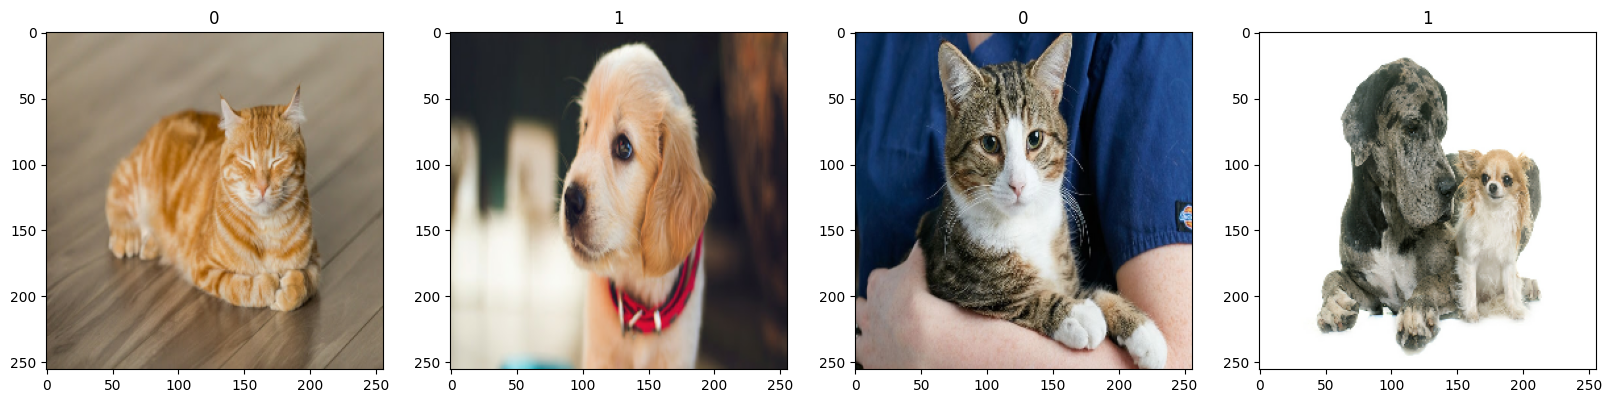

In [113]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 2.2 Split data

In [114]:
len(data)

7

In [119]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.2)


In [120]:
train_size+val_size+test_size

7

In [121]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Deep Model

### 3.1 Building Deep Learning Model

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [123]:
model = Sequential()

In [124]:
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [125]:
tf.losses.BinaryCrossentropy??

Init signature:
tf.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='binary_crossentropy',
    dtype=None,
)
Source:        
@keras_export("keras.losses.BinaryCrossentropy")
class BinaryCrossentropy(LossFunctionWrapper):
    """Computes the cross-entropy loss between true labels and predicted labels.

    Use this cross-entropy loss for binary (0 or 1) classification applications.
    The loss function requires the following inputs:

    - `y_true` (true label): This is either 0 or 1.
    - `y_pred` (predicted value): This is the model's prediction, i.e, a single
        floating-point value which either represents a
        [logit](https://en.wikipedia.org/wiki/Logit), (i.e, value in [-inf, inf]
        when `from_logits=True`) or a probability (i.e, value in [0., 1.] when
        `from_logits=False`).

    Args:
        from_logits: Whether to interpret `y_pred` as a tensor of
            [logit](htt

In [126]:


model.compile(optimizer= 'adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

### 3.2 Train

In [127]:
logdir = "logs" 

In [128]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [129]:
len(train)


4

In [130]:
batch = val.as_numpy_iterator()
batch.next()

(array([[[[0.73901653, 0.7154871 , 0.5821538 ],
          [0.7359911 , 0.71851254, 0.5821538 ],
          [0.73509496, 0.7194087 , 0.57431066],
          ...,
          [0.61250764, 0.4016774 , 0.0879519 ],
          [0.6807828 , 0.45153952, 0.12638633],
          [0.7064798 , 0.46636796, 0.11704963]],
 
         [[0.7411765 , 0.7176471 , 0.58431375],
          [0.738151  , 0.7206725 , 0.58431375],
          [0.7364108 , 0.7224127 , 0.5764706 ],
          ...,
          [0.61250764, 0.4016774 , 0.0879519 ],
          [0.6807828 , 0.45153952, 0.12638633],
          [0.7064798 , 0.46636796, 0.11704963]],
 
         [[0.7411765 , 0.7254902 , 0.5882353 ],
          [0.7411765 , 0.7254902 , 0.5882353 ],
          [0.7372549 , 0.7254902 , 0.5882353 ],
          ...,
          [0.61250764, 0.4016774 , 0.0879519 ],
          [0.6807828 , 0.45153952, 0.12638633],
          [0.7064798 , 0.46636796, 0.11704963]],
 
         ...,
 
         [[0.9303768 , 0.81362134, 0.67437506],
          [0.93732

In [131]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 600ms/step - accuracy: 0.6219 - loss: 1.0500 - val_accuracy: 0.4375 - val_loss: 0.7741
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 765ms/step - accuracy: 0.4396 - loss: 0.7577 - val_accuracy: 0.6719 - val_loss: 0.6760
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 748ms/step - accuracy: 0.7083 - loss: 0.6585 - val_accuracy: 0.6562 - val_loss: 0.6275
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 856ms/step - accuracy: 0.6083 - loss: 0.6691 - val_accuracy: 0.7656 - val_loss: 0.6601
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 910ms/step - accuracy: 0.6646 - loss: 0.6474 - val_accuracy: 0.6250 - val_loss: 0.6287
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 848ms/step - accuracy: 0.6406 - loss: 0.6575 - val_accuracy: 0.7969 - val_loss: 0.6081
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 755ms/step - accuracy: 0.7406 - loss: 0.6164 - val_accuracy: 0.7031 - val_loss: 0.5180
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 920ms/step - accuracy: 0.6771 - loss: 0.5707 - val_accuracy: 0.7969 - val_loss: 0.5327
Epo

### 3.3 Plot Performance

In [132]:
hist.history

{'accuracy': [0.5859375,
  0.4140625,
  0.6875,
  0.6171875,
  0.671875,
  0.6953125,
  0.7265625,
  0.640625,
  0.8203125,
  0.6640625,
  0.8515625,
  0.8984375,
  0.8984375,
  0.921875,
  0.9453125,
  0.96875,
  0.953125,
  0.9765625,
  0.984375,
  0.9921875],
 'loss': [1.0442878007888794,
  0.7418925762176514,
  0.6849511861801147,
  0.6728136539459229,
  0.6354080438613892,
  0.6385324001312256,
  0.6002691984176636,
  0.609907329082489,
  0.5074290633201599,
  0.5061621069908142,
  0.4665931165218353,
  0.3237685561180115,
  0.26727673411369324,
  0.2417156994342804,
  0.19512096047401428,
  0.14148996770381927,
  0.13721777498722076,
  0.07458087056875229,
  0.05695414915680885,
  0.03947053104639053],
 'val_accuracy': [0.4375,
  0.671875,
  0.65625,
  0.765625,
  0.625,
  0.796875,
  0.703125,
  0.796875,
  0.71875,
  0.828125,
  0.96875,
  0.90625,
  0.875,
  0.96875,
  0.96875,
  0.9375,
  1.0,
  0.96875,
  0.953125,
  0.96875],
 'val_loss': [0.774145245552063,
  0.67601817846

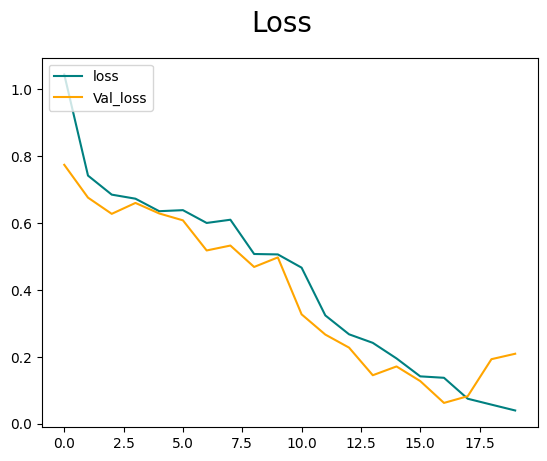

In [133]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'Val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

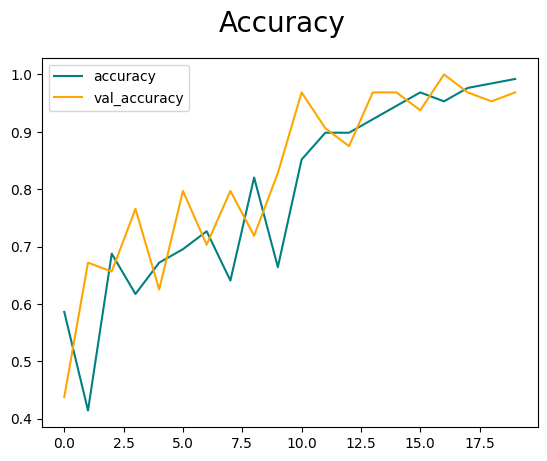

In [134]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

## 4. Evaluate Performance

### 4.1 Evaluate

In [135]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [136]:
precision = Precision()
recall = Recall()
binaccuracy = BinaryAccuracy()

In [137]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    binaccuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [138]:
print(f'Precison: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Binary Accuracy: {binaccuracy.result().numpy()}')

Precison: 1.0, Recall: 1.0, Binary Accuracy: 1.0


### 4.2 Test

In [139]:
import cv2

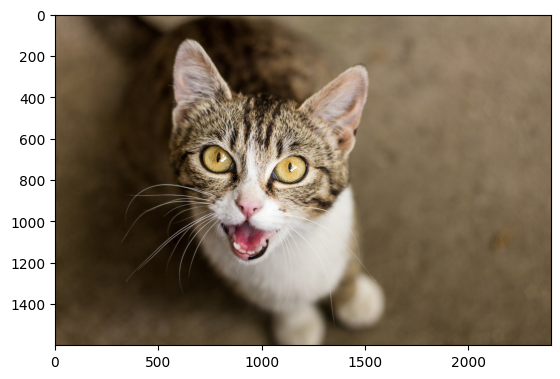

In [158]:
img = cv2.imread('cattest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

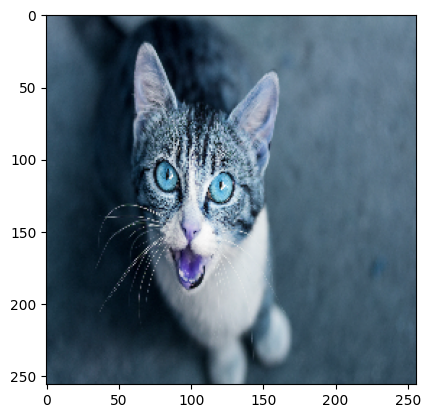

In [159]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [160]:
#Our neural net accepts us to pass a batch of images, not a single image. so, we have to expand dimensions.
print(resize.shape)
print(np.expand_dims(resize, 0).shape) #what axis we have to apply our extra dim here it is 0 

(256, 256, 3)
(1, 256, 256, 3)


In [161]:
yhat = model.predict(np.expand_dims(resize/255, 0)) # scale data by dividing with max value which is 255 (0-255 pixel values range)
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[2.6429172e-05]], dtype=float32)

In [162]:
if yhat >0.5:
    print(f'Predicted class is dog')
else:
    print(f'Predicted class is cat')

Predicted class is cat


## 5. Save Model

In [163]:
from tensorflow.keras.models import load_model

In [166]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [ ]:
new_model = load_model(os.path.join('models', 'catdogmodel.h5'))

In [169]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [170]:
if yhat_new >0.5:
    print(f'Predicted class is dog')
else:
    print(f'Predicted class is cat')

Predicted class is cat
